# Project 1: Business Sales Analysis

## Objective
Analyze sales trends, customer purchasing behavior, and product performance
to identify revenue drivers and support data-driven business decisions.

## Dataset
Source: Simulated Business Sales Dataset  
Domain: Business / Retail Sales  
Analysis Type: Exploratory Data Analysis (EDA) + Customer & Product Analytics

In [8]:
import pandas as pd

# Create sales dataset
data = {
    "Order_ID": [1,2,3,4,5,6,7,8,9,10],
    "Order_Date": [
        "2024-01-01","2024-01-02","2024-01-03","2024-01-05","2024-01-07",
        "2024-02-01","2024-02-03","2024-02-05","2024-02-07","2024-02-10"
    ],
    "Customer_ID": ["C001","C002","C003","C001","C004","C002","C005","C001","C003","C004"],
    "Product": ["Laptop","Mobile","Shoes","Headphones","T-shirt","Laptop","Mobile","Laptop","Shoes","T-shirt"],
    "Category": ["Electronics","Electronics","Fashion","Electronics","Fashion",
                 "Electronics","Electronics","Electronics","Fashion","Fashion"],
    "Quantity": [1,2,3,1,4,1,1,2,2,3],
    "Unit_Price": [55000,20000,3000,3000,1200,55000,20000,55000,3000,1200]
}

df = pd.DataFrame(data)

# Create Total Sales
df["Total_Sales"] = df["Quantity"] * df["Unit_Price"]

df
df.to_csv("sales_data.csv", index=False)
df = pd.read_csv("sales_data.csv")
df.head()

,Order_ID,Order_Date,Customer_ID,Product,Category,Quantity,Unit_Price,Total_Sales
0,1,2024-01-01,C001,Laptop,Electronics,1,55000,55000
1,2,2024-01-02,C002,Mobile,Electronics,2,20000,40000
2,3,2024-01-03,C003,Shoes,Fashion,3,3000,9000
3,4,2024-01-05,C001,Headphones,Electronics,1,3000,3000
4,5,2024-01-07,C004,T-shirt,Fashion,4,1200,4800


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style directly
sns.set_style("whitegrid")  # Use whitegrid or darkgrid, works without plt.style

# Set global parameters for all plots
plt.rcParams.update({
    "figure.figsize": (8,5),
    "axes.titlesize": 14,
    "axes.labelsize": 12,
    "xtick.labelsize": 10,
    "ytick.labelsize": 10,
    "legend.fontsize": 10,
    "lines.linewidth": 2
})

# Optional: suppress warnings for clean notebook
import warnings
warnings.filterwarnings("ignore")

In [26]:
df = pd.read_csv("sales_data.csv")
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df = df.drop_duplicates()
df.head()

,Order_ID,Order_Date,Customer_ID,Product,Category,Quantity,Unit_Price,Total_Sales
0,1,2024-01-01,C001,Laptop,Electronics,1,55000,55000
1,2,2024-01-02,C002,Mobile,Electronics,2,20000,40000
2,3,2024-01-03,C003,Shoes,Fashion,3,3000,9000
3,4,2024-01-05,C001,Headphones,Electronics,1,3000,3000
4,5,2024-01-07,C004,T-shirt,Fashion,4,1200,4800


**Note:** Converted `Order_Date` to datetime and removed duplicates.

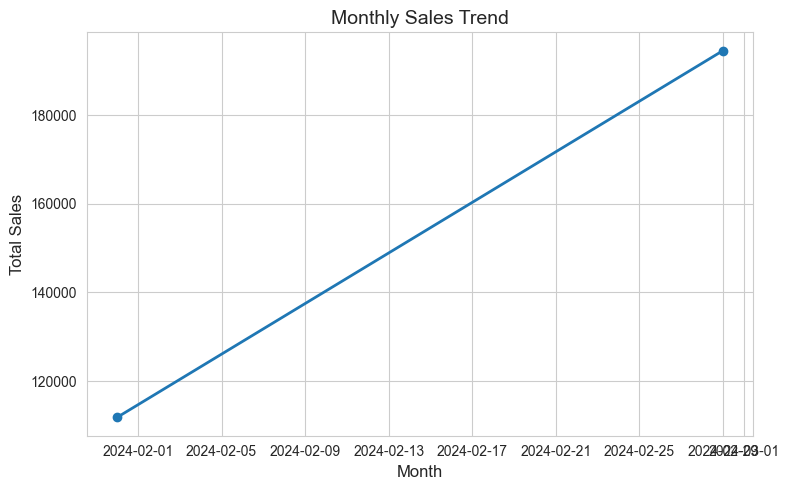

In [27]:
# Aggregate monthly sales using Month-End frequency
monthly_sales = df.resample('ME', on='Order_Date')['Total_Sales'].sum()

# Plot
plt.plot(monthly_sales.index, monthly_sales.values, marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Observation:** The monthly sales trend shows increasing revenue over time, highlighting peak months and overall growth patterns.

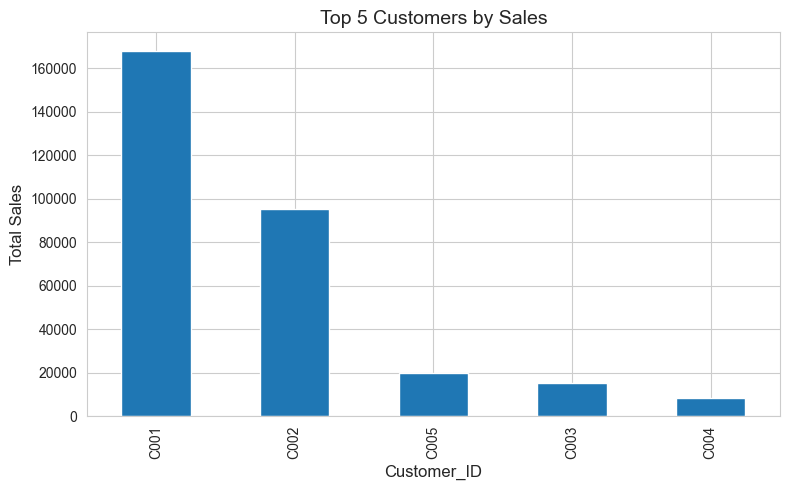

In [28]:
customer_summary = df.groupby('Customer_ID').agg({
    "Total_Sales": "sum",
    "Order_ID": "count"
}).sort_values(by="Total_Sales", ascending=False)

# Top 5 customers by sales
customer_summary["Total_Sales"].head().plot(kind="bar")
plt.title("Top 5 Customers by Sales")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Observation:** A small group of repeat customers drives the majority of revenue. This highlights the importance of customer retention strategies.

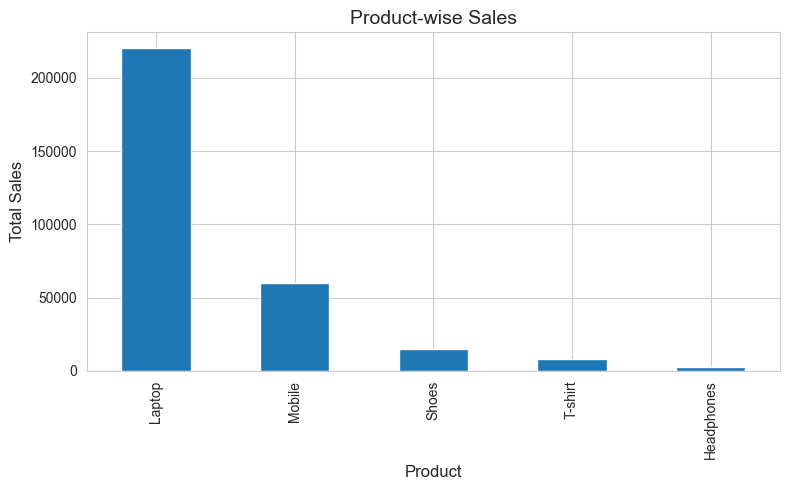

In [29]:
product_summary = df.groupby("Product")["Total_Sales"].sum().sort_values(ascending=False)

product_summary.plot(kind="bar")
plt.title("Product-wise Sales")
plt.ylabel("Total Sales")
plt.tight_layout()
plt.show()

**Observation:** Certain products (e.g., Laptop, Mobile) contribute the most revenue, suggesting targeted inventory and marketing for top-selling items.

## Key Insights
- Monthly sales trend shows an overall upward trajectory.
- Repeat customers significantly contribute to total revenue.
- Few high-performing products dominate sales.

## Recommendations
- Focus marketing on high-value products.
- Implement loyalty programs for top customers.
- Plan inventory and promotions based on monthly trends.

## Dataset Conclusion
The business sales dataset provides a comprehensive view of sales performance, customer behavior, and product contributions. 

Analysis shows clear monthly trends, significant revenue from repeat customers, and dominance of high-value products. 

Overall, the dataset is well-structured and can guide data-driven decisions in marketing, inventory management, and customer retention.
